In [7]:
print("Hello world!")

Hello world!


In [8]:
#For and while loops
for i in range(10):
    print(i)
i = 0
while i < 10:
    i += 1
    print(i)

    

0
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10


In [9]:
weight = int(input())
if weight <= 40:
    print("You are anoreksik!!! Go to the eat chicken!!!")
elif weight <= 60:
    print("You are beatiful!!!")
elif weight <= 100:
    print("Your weight so-so!")
else:
    print("You need go to the sport!!!")
    
    

100
Your weight so-so!


In [20]:
#import lib for machine learning
import torch

In [26]:
#Init tensor for learning
X = torch.tensor([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]], requires_grad=True)
alpha = 0.01
optimizer = torch.optim.SGD([X], alpha)
function = (torch.sin(X) * X ** 2).sum()
# First iteration
function.backward() # Derivative for function
optimizer.step() # Iteration(We need zero grad, becouse grad == sum of all grad)
optimizer.zero_grad() # zero grad

print("Weights:\n", X, "\nWeights second(X.data)\n", X.data) # out weights



Weights:
 tensor([[0.9778, 1.9803, 3.0806],
        [4.1651, 5.0250, 5.6879],
        [6.5386, 7.9348, 9.6638]], requires_grad=True) 
Weights second(X.data)
 tensor([[0.9778, 1.9803, 3.0806],
        [4.1651, 5.0250, 5.6879],
        [6.5386, 7.9348, 9.6638]])


In [27]:
y = torch.tensor([[5., 6., 7., 8.],[12., 13., 16., 18.]], requires_grad=True)
alpha = 0.01
optimizer = torch.optim.SGD([y], alpha)
for i in range(500):
    function = (torch.log( - y + y ** 2) * torch.sin(y)).sum()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()
print(y)

tensor([[ 4.8691,  4.8691,  4.8691, 11.0360],
        [11.0360, 11.0360, 17.2999, 17.2999]], requires_grad=True)


In [31]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(444)

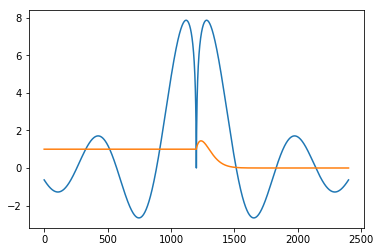

In [112]:
import math
x = [math.sin(float(i/100))*math.log(float(i/100+(100*i/100)**2+3))*1/(1 if i == 0 else i/100) for i in range(-1200, 1201)]
plt.plot(x)
x = [((i/100 if i >=0 else 1)**(-i/100))  for i in range(-1200, 1201)]
plt.plot(x)

In [81]:
import torch


In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure



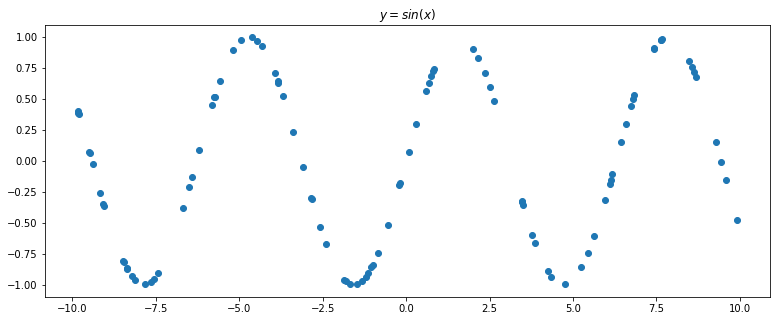

In [83]:
#Train dataset
figure(figsize=(13.0, 5.0))
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

Text(0.5, 1.0, 'Gaussian noise')

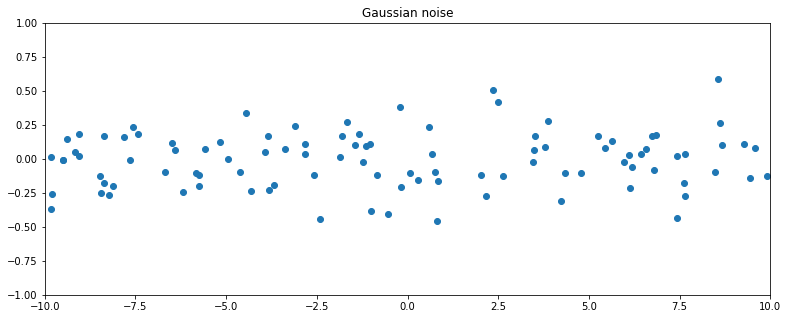

In [84]:
figure(figsize=(13.0, 5.0))
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(),noise.numpy(), 'o')
plt.axis([-10,10, -1, 1])
plt.title('Gaussian noise')

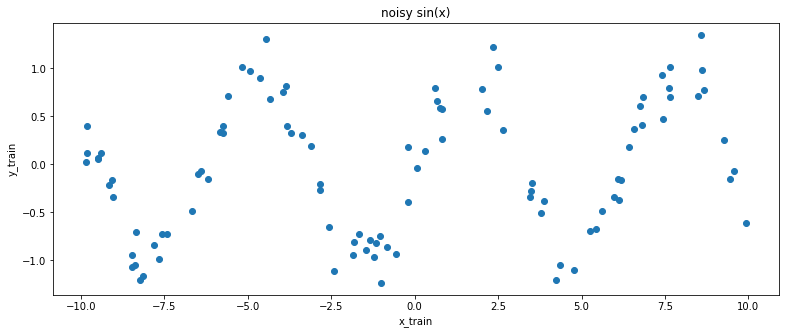

In [85]:
figure(figsize=(13.0, 5.0))
y_train += noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [86]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [87]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1));

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

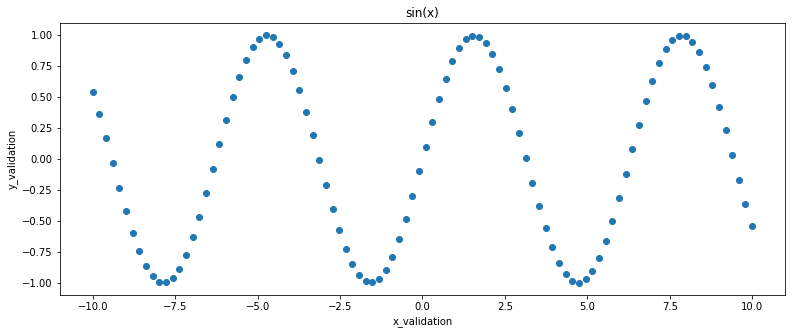

In [92]:
figure(figsize=(13.0, 5.0))
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title("sin(x)")
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [93]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

# Model construction

In [115]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # first layer, (input, hidden)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons,1 )
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x
    
class SineNet2(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet2, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
sine_net = SineNet(50)
sine_net2 = SineNet2(50)

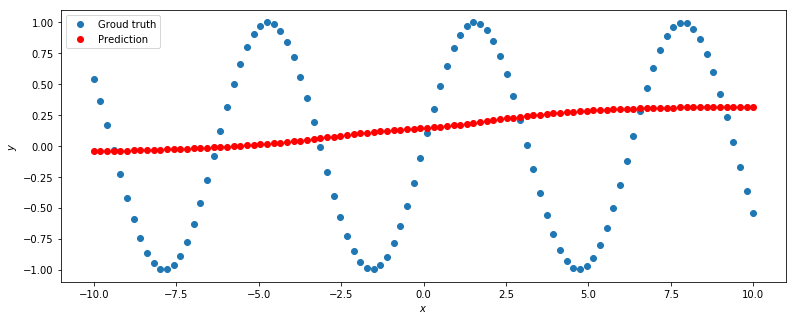

In [101]:
figure(figsize=(13.0, 5.0))
def predict(net, x, y):
    y_pred = net.forward(x)
    
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    
predict(sine_net, x_validation, y_validation)

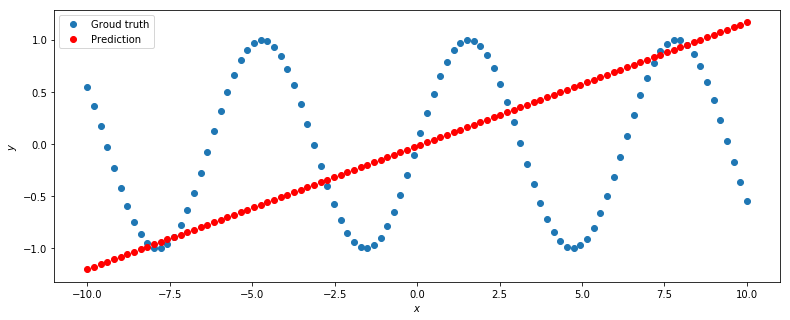

In [104]:
figure(figsize=(13.0, 5.0))
predict(sine_net2, x_validation, y_validation)

# Optimizer 

In [109]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

# Loss function

In [110]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

# Training procedure

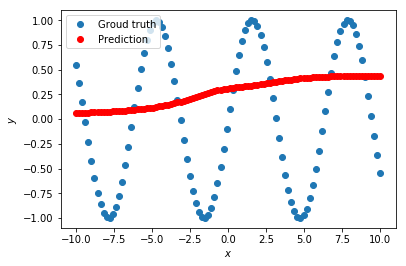

In [114]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    
    optimizer.step()
predict(sine_net, x_validation, y_validation)